# Preprocessing: 

In [2]:
import pandas as pd
import numpy as np
import sys
sys.setrecursionlimit(10000)

In [3]:
comb_files = pd.read_csv('DATA/concat_615.csv')

In [4]:
comb_files.shape

(2460, 18097)

In [5]:
comb_no0 = comb_files.loc[:, (comb_files != 0).any(axis=0)]

In [6]:
comb_no0 = comb_no0.drop('Unnamed: 0', axis=1)

# Pearson Correlation:

In [ ]:
corr_matrix = comb_no0.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
# Sorting highest correlated features
corr_matrix['y'].sort_values(ascending=False)
# Putting the Correlated features and their pearson correlation in a dictionary 
dic = corr_matrix['y'].sort_values(ascending=False).to_dict()
corr_list = list(dic.items())

In [7]:
corr_list.sort(key = lambda x : x[1], reverse = True)
import pickle
# with open('pearson_corr_feats.pkl', 'wb') as f:
#     pickle.dump(corr_list, f)
# with open('feature_selection.pkl', 'rb') as f:
#     unpickler = pickle.Unpickler(f)
#     corr_list = unpickler.load()

select_feat_names = [x[0] for x in select_feats]
select_Xs = file_615_drop0_df[select_feat_names].to_numpy()
print(select_Xs.shape)

In [8]:
len(corr_list)

1008

In [36]:
# dic = corr_matrix['y'].sort_values(ascending=False).to_dict() 
#corr_list = list(dic.items())
#del corr_list[17]
#del corr_list[17]
# corr_list

In [9]:
# List of correlated features and their correlation values (*100 --> %)
# Correlation value in relation to output "LABELS"
neg_corr = corr_list[-8:]
pos_corr = corr_list[1:1000]
new_feats = pos_corr+neg_corr
#with open('feature_selection.pkl', 'wb') as f:
#    pickle.dump(new_feats, f)

In [72]:
column_names = [i[0] for i in new_feats[0:] ]

In [73]:
df_sub = comb_no0.loc[:,column_names]
X = df_sub
y = comb_no0['y']
new_df_sub = pd.concat([df_sub,y], axis = 1)

# Applying PCA:

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [53]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [54]:
X = df_sub
y = comb_no0['y']
df_all = pd.concat([X,y] , axis=1)

In [55]:
from sklearn.preprocessing import StandardScaler # Standardizing the features
X = StandardScaler().fit_transform(X)

In [56]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [57]:
principalDf

,principal component 1,principal component 2
0,-5.557509,0.952802
1,-6.712772,0.689102
2,0.590242,0.974702
3,-3.010539,6.229100
4,-9.199577,1.932959
...,...,...
2455,4.406055,-7.318837
2456,-7.182152,1.119282
2457,7.069135,-7.166324
2458,-6.982309,-6.596109


In [58]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [59]:
finalDf

,principal component 1,principal component 2,y
0,-5.557509,0.952802,0
1,-6.712772,0.689102,0
2,0.590242,0.974702,0
3,-3.010539,6.229100,0
4,-9.199577,1.932959,0
...,...,...,...
2455,4.406055,-7.318837,3
2456,-7.182152,1.119282,3
2457,7.069135,-7.166324,3
2458,-6.982309,-6.596109,3


Text(0.5, 1.0, 'PCA on 253 Features:')

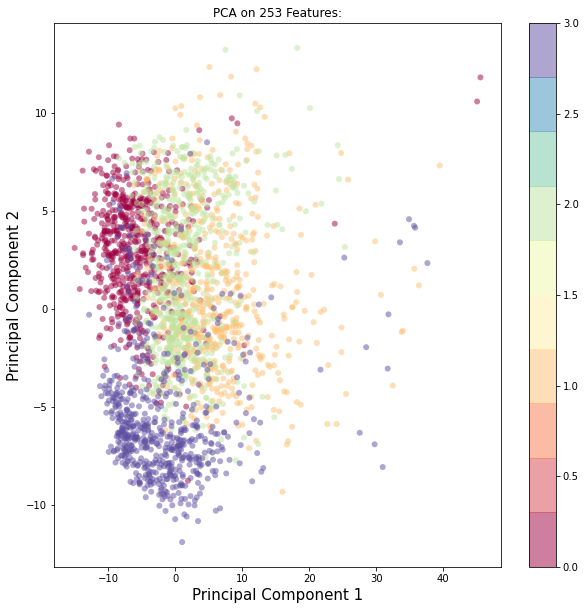

In [60]:
fig = plt.figure(figsize = (10,10))
plt.scatter(finalDf.iloc[:,0],finalDf.iloc[:,1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.colorbar();
plt.title("PCA on 253 Features:")

# t-SNE:

In [74]:
tsne = TSNE(n_components=2) # verbose=1, perplexity=50, n_iter=250 tsne_results = tsne.fit_transform(X)
tsne_results = tsne.fit_transform(df_sub)

In [75]:
tsne_results[:,1]
df_tsne = pd.DataFrame(data=tsne_results, columns=["tsne-2d-one", "tsne-2d-two"])
print(df_tsne)

      tsne-2d-one  tsne-2d-two
0       23.839499   -28.557320
1       10.421405   -21.624422
2       21.496336    -6.284319
3       19.770716    -1.519352
4       24.350086   -22.077093
...           ...          ...
2455   -23.901419   -22.651291
2456    -6.760542   -28.685709
2457   -23.187397   -21.269249
2458   -48.894405     9.656610
2459    -8.370596   -19.555065

[2460 rows x 2 columns]


In [76]:
df_data = pd.concat([df_tsne, y], axis = 1)

Text(0.5, 1.0, 't-SNE on 1008 Features:')

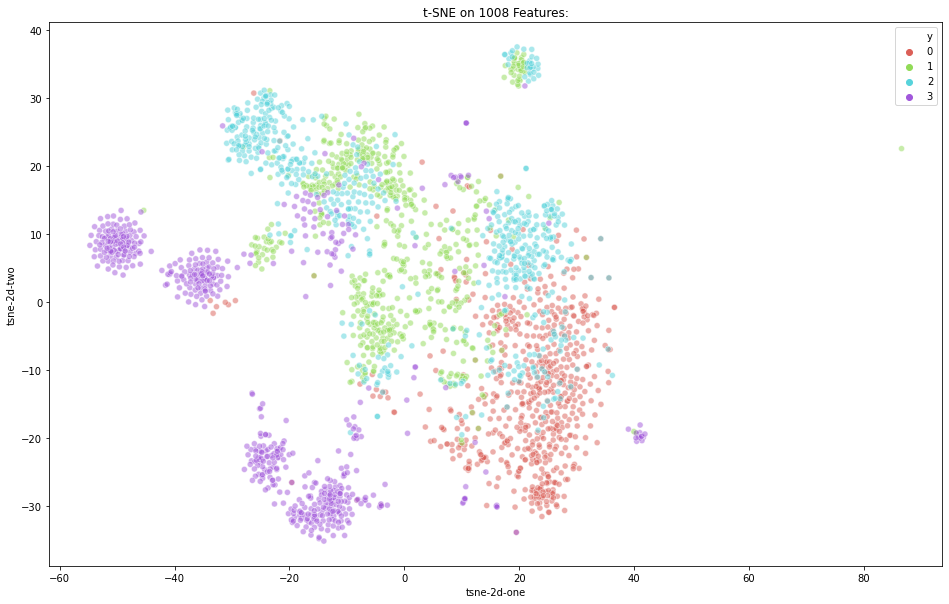

In [77]:
plt.figure(figsize=(16,10)) 
sns.scatterplot(
    x= df_tsne.loc[:,'tsne-2d-one'],y=df_tsne.loc[:,'tsne-2d-two'],
    hue= y,
    palette = sns.color_palette("hls", 4),
    data=df_data,
    legend="full",
    alpha=0.5 
)
plt.title('t-SNE on 1008 Features:')

# KNN:

In [80]:
X = df_sub
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [81]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 80  16  30   2]
 [  0 119   7   1]
 [  2  47  85   0]
 [  0  14   4  85]]
              precision    recall  f1-score   support

           0       0.98      0.62      0.76       128
           1       0.61      0.94      0.74       127
           2       0.67      0.63      0.65       134
           3       0.97      0.83      0.89       103

    accuracy                           0.75       492
   macro avg       0.81      0.76      0.76       492
weighted avg       0.80      0.75      0.75       492



Confusion matrix, without normalization
[[ 80  16  30   2]
 [  0 119   7   1]
 [  2  47  85   0]
 [  0  14   4  85]]
Normalized confusion matrix
[[0.625      0.125      0.234375   0.015625  ]
 [0.         0.93700787 0.05511811 0.00787402]
 [0.01492537 0.35074627 0.63432836 0.        ]
 [0.         0.13592233 0.03883495 0.82524272]]


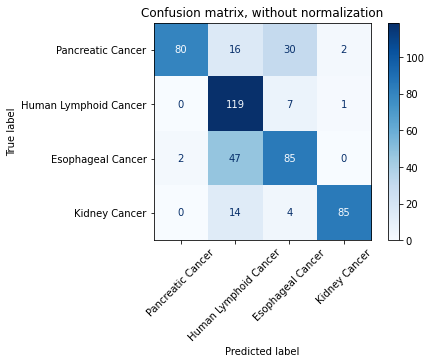

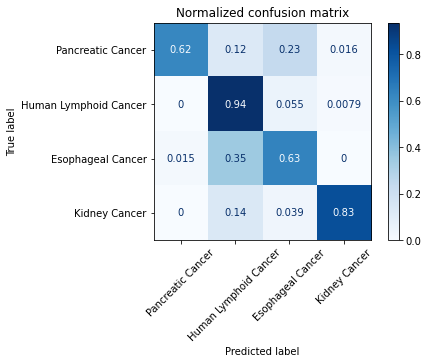

In [47]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
class_names = ['Pancreatic Cancer', 'Human Lymphoid Cancer', 'Esophageal Cancer', 'Kidney Cancer']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    print(title)
    print(disp.confusion_matrix)

In [48]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

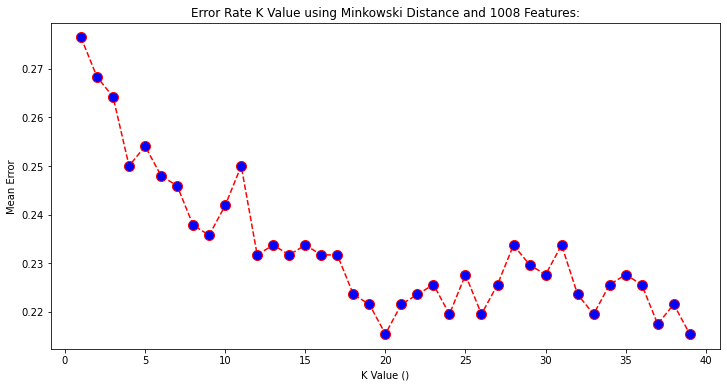

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value using Minkowski Distance and 1008 Features:')
plt.xlabel('K Value ()')
plt.ylabel('Mean Error')
plt.savefig('Initial KNN Data.png')

# Improving Model, for Final Presentation:

## Using Manhattan Distance:

In [78]:
classifier_new = KNeighborsClassifier(n_neighbors=11, metric = 'manhattan')
classifier_new.fit(X_train, y_train)

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
y_pred = classifier_new.predict(X_test)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

In [53]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric = "manhattan")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

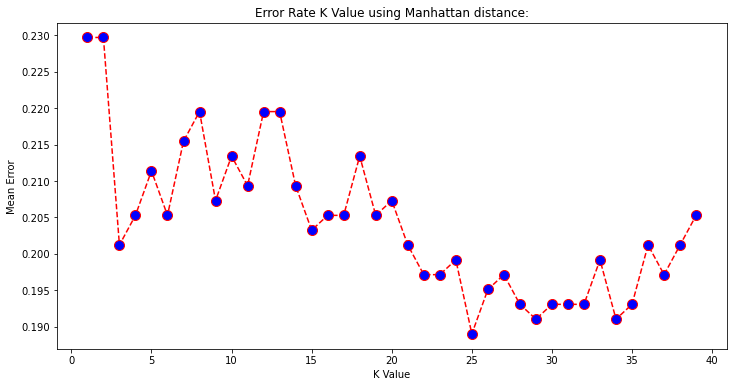

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value using Manhattan distance:')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Further reducing the number of features:

In [55]:
neg_corr2 = corr_list[-8:]
pos_corr2 = corr_list[1:245]
new_feats2 = pos_corr2+neg_corr2
len(new_feats2)
#new_feats2

252

In [56]:
column_names2 = [i[0] for i in new_feats2[0:] ]
df_sub2 = comb_no0.loc[:,column_names2]
X2 = df_sub2
y = comb_no0['y']
new_df_sub2 = pd.concat([df_sub2,y], axis = 1)

In [57]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train2)

# X_train = scaler.transform(X_train2)
# X_test = scaler.transform(X_test2)
# Scaling doesn't affect the accuracy, this means that the features have similar ranges:

from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 4, weights = 'distance', metric = "manhattan")

classifier2.fit(X_train2, y_train2)
y_pred2 = classifier2.predict(X_test2)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[113   2  14   6]
 [  2 114   6   0]
 [  4  12  95   1]
 [  3   1   0 119]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       135
           1       0.88      0.93      0.91       122
           2       0.83      0.85      0.84       112
           3       0.94      0.97      0.96       123

    accuracy                           0.90       492
   macro avg       0.90      0.90      0.90       492
weighted avg       0.90      0.90      0.90       492



Confusion matrix, without normalization
[[113   2  14   6]
 [  2 114   6   0]
 [  4  12  95   1]
 [  3   1   0 119]]
Normalized confusion matrix
[[0.83703704 0.01481481 0.1037037  0.04444444]
 [0.01639344 0.93442623 0.04918033 0.        ]
 [0.03571429 0.10714286 0.84821429 0.00892857]
 [0.02439024 0.00813008 0.         0.96747967]]


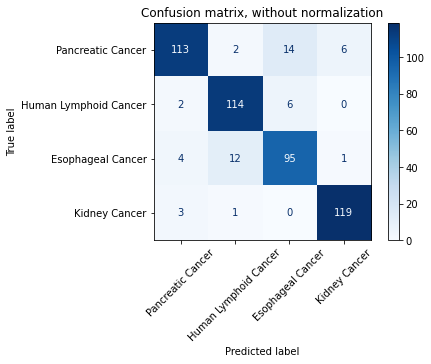

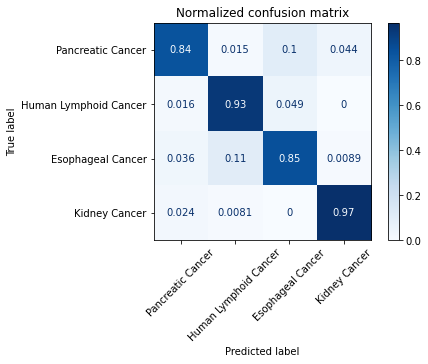

In [59]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
class_names = ['Pancreatic Cancer', 'Human Lymphoid Cancer', 'Esophageal Cancer', 'Kidney Cancer']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier2, X_test2, y_test2,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    print(title)
    print(disp.confusion_matrix)

In [60]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, weights = 'distance', metric = "manhattan")
    knn.fit(X_train2, y_train2)
    pred_i = knn.predict(X_test2)
    error.append(np.mean(pred_i != y_test2))

Text(0, 0.5, 'Mean Error')

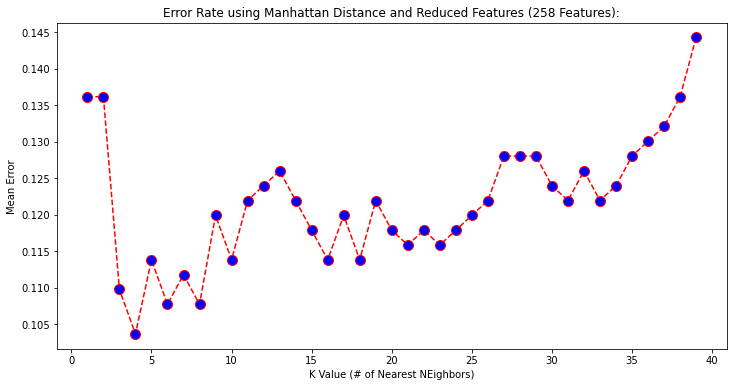

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate using Manhattan Distance and Reduced Features (258 Features):')
plt.xlabel('K Value (# of Nearest NEighbors)')
plt.ylabel('Mean Error')
#plt.savefig('Final KNN Data.png')

# Predicting on 1000 data points:

In [62]:
X_test_1000 = pd.read_csv('test_1000.csv')

In [63]:
# X_test_1000 = X_test_1000.drop(["Unnamed: 0", "index"], axis = 1)
y_new = X_test_1000.loc[:,'y']

In [64]:
X_new = X_test_1000.loc[:,column_names2]
y_pred_1000 = classifier2.predict(X_new)

Confusion matrix, without normalization
[[227   6  11   6]
 [  1 242   7   0]
 [  4  37 208   1]
 [  1   1   0 248]]
Normalized confusion matrix
[[0.908 0.024 0.044 0.024]
 [0.004 0.968 0.028 0.   ]
 [0.016 0.148 0.832 0.004]
 [0.004 0.004 0.    0.992]]


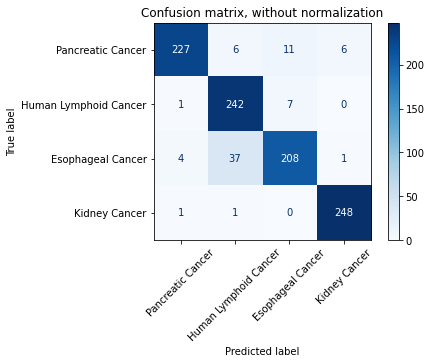

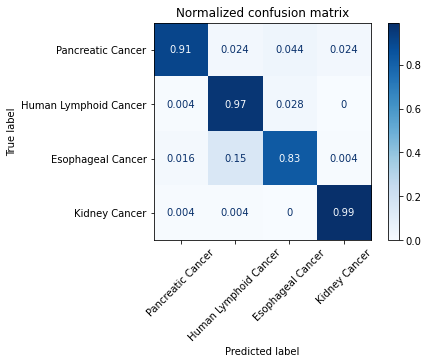

In [65]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
class_names = ['Pancreatic Cancer', 'Human Lymphoid Cancer', 'Esophageal Cancer', 'Kidney Cancer']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier2, X_new, y_new,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    print(title)
    print(disp.confusion_matrix)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_new, y_pred_1000))
print(classification_report(y_new, y_pred_1000))

[[227   6  11   6]
 [  1 242   7   0]
 [  4  37 208   1]
 [  1   1   0 248]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       250
           1       0.85      0.97      0.90       250
           2       0.92      0.83      0.87       250
           3       0.97      0.99      0.98       250

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.93      0.92      1000

